# A distance to the Large Magellanic Cloud with Eclipsing Binaries
***

<b>Author:</b> Lucas T. Santana

<b>Affiliation:</b> Instituto de Física - Universidade Federal do Rio de Janeiro, Brazil

This tutorial introduces the study of eclipsing binary stars, showing its main features, such as light curves, radial velocity curves, and surface brightness-color correlation. I briefly explain the techniques to determine a distance to the Large Magellanic Cloud accurate to two percent, following Pietrzynski <i>et al.</i> 2013 paper <a href = '#Pietrzynski'>[1]</a>. This has recently been used to determine the local value of Hubble's constant $H_0$, providing stronger evidence for physics beyond $\Lambda$CDM <a href = '#Riess'>[2]</a>. The contents are summarized as follows:

1. <a href = '#intro'>Introduction</a>
1. <a href = '#lcrv'>Light curve and radial velocity curve modeling</a>
    1. <a href = '#orbit'>Orbit and star parameters</a>
    1. <a href = '#eclipse'>Eclipse equations</a>
1. <a href = '#ebpiet'>The eclipsing binaries used by Pietrzynski <i>et al.</i></a>
    1. <a href = '#rv'>Radial velocity curves</a>
    1. <a href = '#lc'>Light curve</a>
    1. <a href = '#obsebs'>The observed EBs</a>
1. <a href = '#sbcr'>Surface brightness-color relation</a>
1. <a href = '#dlmc'>A distance to the Large Magellanic Cloud</a>

I provide a brief introduction to the physics of eclipsing binaries and provide Python 3 codes that determine simplified light curves and radial velocity curves, and using the physical parameters fitted for objects used in Ref. <a href = '#Pietrzynski'>[1]</a> to obtain a distance to the Large Magellanic Cloud. To do that, the following packages are needed:

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib 
import ipywidgets        as widgets

from uncertainties import ufloat
from uncertainties.umath import *
from matplotlib import rc
from IPython.display import HTML
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
matplotlib.rcParams.update({'font.size': 20})
rc('text', usetex = True)
eb_coords = '<img src = "img/eb_coordinates.png" width = "400" height = "400" align = "center"/>'

## <a id = 'intro'>Introduction</a>

<b>Eclipsing Binary</b> (EB) stars are just one of several types of variable stars. They appear as a single point of light to an observer, but based on its brightness variation and spectroscopic observations we can say for certain that the single point of light is actually two stars in close orbit around one another. The variations in light intensity from eclipsing binary stars is caused by one star passing in front of the other relative to an observer.

The study of binaries is the only way to directly measure the masses of stars, arguably the most important characteristic of stars that we need in order to understand them <a href = '#Bradstreet'>[3]</a>. Understanding and analyzing the way the light curve of the two stars changes as they rotate and revolve, when coupled with spectroscopic data revealing their periodic radial velocities, can unlock the secrets of these systems.

In the era of precision cosmology, it is crucial to determine the Hubble constant $H_0$ to an accuracy of three per cent or better. Until 2013, its uncertainty was dominated by the uncertainty in the distance to the Large Magellanic Cloud (LMC), which, being our second-closest galaxy, serves as the best anchor point for the cosmic distance ladder. In Ref. <a href = '#Pietrzynski'>[1]</a>, the authors have reported determinations of the distances to eight long-period, late-type eclipsing systems in the LMC, composed of cool, giant stars. These systems are particularly interesting for we can accurately measure both the linear and angular sizes of their components and avoid most important problems related to hot, early-type stars. In order to understand how the distance to the LMC has been determined by the study of EBs, we start by looking at how their light curve and radial velocity curves behave.

***
## <a id = 'lcrv'>Light curve and radial velocity curves</a>

<i>Note:</i> This section improves the excelent explanation in the webpage http://www.physics.sfasu.edu/astro/ebstar/ebstar.html, and implements the code in Python 3, also including the plot for the radial velocity curves.

### <a id = 'orbit'>Orbit and star parameters</a>

A brightness versus time plot for a variable star is known as <b>light curve</b>. A recession velocity versus time plot for a variable star is known as a <b>radial velocity curve</b>. For close binary systems, it is convenient to express the time dependence of the brightness and the radial velocity in terms of a <b>phase</b> ($\theta$), that takes values in the interval $[0, 2 \pi) $, according to the relation $ \theta = \frac{2\pi t}{T} $, where $T$ is the <b>orbital period</b> of the binary and $t$ is the <b>observation time</b>.

The shape of the light curve for an EB system depends mostly on the relative brightness and size of the two stars as well as their orbital inclination as seen from Earth. The shape of the radial velocity curves is mainly dependent on the mass ratio between the two stars. For the sake of simplicity, we assume that the two stars are spherical and that they have circular orbits. By doing this, we can use simple geometry to generate a light curve and a radial velocity curves for an idealized binary. For this simple spherical star model, the parameters that are needed to generate a light curve are: 

- $i$ (orbital inclination), 
- $M_1$, $M_2$ (masses of the stars), 
- $L_1$, $L_2$ (luminosities of the stars), and 
- $R_1$, $R_2$ (radii of the stars).

The orbital inclination is measured relative to the observer in degrees (${}^{\circ}$) and is ${90}^{\circ}$ for edge-on orbits. Stars 1 and 2 are, respectively, called, the <b>primary</b> and <b>secondary</b> components of the binary. We shall assume, without loss of generality, that $R_1 > R_2$, and apply our simplified model to the EBs in Ref. <a href = '#Pietrzynski'>[1]</a> accordingly.

### <a id = 'eclipse'>Eclipse equations</a>

We choose an origin $\mathcal{O}$ at the position of the baricenter of the system. Since this is a two-body problem, it is convenient to introduce:

\begin{equation}
    \vec{R}_{CM} := \frac{M_1 \vec{r}_1 + M_2 \vec{r}_2}{M_1 + M_2}\,, \quad \vec{r} := \vec{r}_2 - \vec{r}_1\,,
\end{equation}

the position vector of the <b>baricenter of the system</b>, and the <b>relative</b> position vector, respectively. From our choice of origin,

\begin{equation}
    \vec{R}_{CM} = 0 \Leftrightarrow \vec{r}_1 = -q \vec{r}_2\,,
\end{equation}

where we have defined $q := M_2/M_1$. Applying the previous result in the relative position, it is easy to obtain

\begin{equation}
    \vec{r}_1 = -\frac{\vec{r}}{1 + 1/q}\,, \quad \vec{r}_2 = \frac{\vec{r}}{1 + q}\,.
\end{equation}

In [3]:
HTML(eb_coords)

Let us introduce a coordinate system $\mathcal{O}xyz$ centered at $\mathcal{O}$, with the $\mathcal{O}z$ axis pointing from $\mathcal{O}$ to the observer. In order to decompose $\vec{r}_1$ and $\vec{r}_2$ in the chosen coordinate system, we first assume the orbit to lie in the $\mathcal{O}xz$ plane. Defining $\theta$ as the angle between the $\mathcal{O}z$ axis and the relative position $\vec{r}$,

\begin{equation}
    \vec{r} = r (\sin{\theta} \hat{e}_x + \cos{\theta} \hat{e}_z) \,,
\end{equation}
<i>i.e.</i>

\begin{equation}
    \left( \begin{array}{c} x \\ y \\ z \end{array} \right) = 
    \left( \begin{array}{c} r\sin{\theta} \\ 0 \\ r\cos{\theta} \end{array} \right)\,.
\end{equation}

We then rotate the coordinate system with respect to the $\mathcal{O}x$ axis by the angle $i$ using the following matrix:

\begin{equation}
    \left( \begin{array}{ccc} 
            1 &     0    &     0    \\
            0 & -\sin{i} &  \cos{i} \\
            0 & \cos{i}  &  \sin{i}
           \end{array} 
    \right)\,.
\end{equation}

The new coordinates $(x', y', z')$ are given by

\begin{equation}
    \left( \begin{array}{c} x' \\ y' \\ z' \end{array} \right) = 
    \left( \begin{array}{ccc} 
            1 &     0    &     0    \\
            0 & -\sin{i} &  \cos{i} \\
            0 & \cos{i}  &  \sin{i}
           \end{array} 
    \right)
    \left( \begin{array}{c} r\sin{\theta} \\ 0 \\ r\cos{\theta} \end{array} \right) = 
    \left( \begin{array}{c} r\sin{\theta} \\ r\cos{i}\cos{\theta} \\ r\sin{i}\cos{\theta} \end{array} \right)\,.
\end{equation}

To simplify notation, we drop the primes, and obtain the final components of the relative position vector $\vec{r}$ in the chosen coordinate system, for a general inclination $i$ of the orbit.

\begin{equation}
    \left( \begin{array}{c} x \\ y \\ z \end{array} \right) = 
    \left( \begin{array}{c} r\sin{\theta} \\ r\cos{i}\cos{\theta} \\ r\sin{i}\cos{\theta} \end{array} \right)\,.
\end{equation}

Luminosity is defined to be the amount of energy escaping from a star's surface per unit time. The energy flux, $F$, at the surface of a star is the amount of energy radiated per unit area per unit time. For spherical, uniformly lit stars we can write

\begin{equation}
    F_1 := \frac{L_1}{4\pi R_1^2}\,, \quad F_2 := \frac{L_2}{4\pi R_2^2}\,.
\end{equation}

If we ignore limb darkening, then we can approximate the measured brightness of the binary star system as seen by an observer as

\begin{equation}
    I = K (F_1 A_1 + F_2 A_2)\,
\end{equation}

where $A_1$ and $A_2$ are the areas of the star disks seen by the observer and $K$ is a constant that can be determined from the area of the observer's detector and the distance between the Earth and the binary star system. $A_1$ and $A_2$ can be found by considering the geometry of the eclipses. To find these areas we need to know the <b>apparent distance</b> $\rho$ between the two stars as seen by an observer. Since the $\mathcal{O}z$ is parallel to the line of sight, this is just the apparent distance between the centers of the stars, determined by the Euclidean distance in the plane $\mathcal{O}xy$,

\begin{equation}
    \rho := \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}\,.
\end{equation}

If $z_1 > z_2$, the values of $A_1$ and $A_2$ are (we chose $R_1 > R_2$):

- $A_1 = \pi R_1^2$ and $A_2 = \pi R_2^2$, for $R_1 + R_2 < \rho$ (no eclipse);
- $A_1 = \pi R_1^2$ and $A_2 = \pi R_2^2 - \Delta A_1 - \Delta A_2$, for $\sqrt{R_1^2 - R_2^2} < \rho < R_1 + R_2$ (shallow eclipse);
- $A_1 = \pi R_1^2$ and $A_2 = \Delta A_2 - \Delta A_1 $, for $R_1 - R_2 < \rho < \sqrt{R_1^2 - R_2^2}$ (deep eclipse);
- $A_2 = \pi R_1^2$ and $A_2 = 0 $, for $\rho < R_1 - R_2$ (total eclipse).

On the other hand, if $z_2 > z_1$, the values of $A_1$ and $A_2$ are:

- $A_1 = \pi R_1^2$ and $A_2 = \pi R_2^2$, for $R_1 + R_2 < \rho$ (no eclipse);
- $A_1 = \pi R_1^2 - \Delta A_1 - \Delta A_2 $ and $A_2 = \pi R_2^2 $, for $\sqrt{R_1^2 - R_2^2} < \rho < R_1 + R_2$ (shallow eclipse);
- $A_1 = \pi R_1^2 - \pi R_2^2 + \Delta A_2 - \Delta A_1$ and $A_2 = \pi R_2^2 $, for $R_1 - R_2 < \rho < \sqrt{R_1^2 - R_2^2}$ (deep eclipse);
- $A_2 = \pi R_1^2 - \pi R_1^2$ and $A_2 = \pi R_2^2$, for $\rho < R_1 - R_2$ (annular).

In the previous equations, $\Delta A$ corresponds to the area of a portion of a circle with radius $R$ cut by a line segment:

\begin{equation}
    \Delta A = \frac{R^2}{2}(\phi - \sin{\phi})\,.
\end{equation}

Hence,

\begin{equation}
    \Delta A_1 = \frac{R_1^2}{2}(\phi_1 - \sin{\phi_1})\,, \quad 
    \Delta A_2 = \frac{R_2^2}{2}(\phi_2 - \sin{\phi_2})\,,
\end{equation}

where $\phi_1$ and $\phi_2$ are determinied from the law of cosines:

\begin{equation}
    \phi_1 = 2 \arccos{\left(\frac{R_1^2 - R_2^2 + \rho^2}{2R_1 \rho}\right)}\,, \quad 
    \phi_2 = 2 \arccos{\left(\frac{R_2^2 - R_1^2 + \rho^2}{2R_2 \rho}\right)}\,.
\end{equation}

### Code implementation

Now, I present a Python code implementation for the light curve and radial velocity curves for the EB. We start by defining the functions we need to compute the eclipses:

In [4]:
def rho(x1, y1, x2, y2): return(np.sqrt((x2 - x1)**2 + (y2 - y1)**2))
    
def F(L, R): return(L/(4 * np.pi * R**2))

def deltaA(Ra, Rb, x1, y1, x2, y2):
    phi = 2*np.arccos((Ra**2 - Rb**2 + rho(x1, y1, x2, y2)**2)/(2 * Ra * rho(x1, y1, x2, y2)))
    if phi > np.pi:
        phi = 2 * np.pi - phi
    return((1/2) * Ra**2 * (phi - np.sin(phi)))

def As(R1, R2, x1, y1, z1, x2, y2, z2):
    d = rho(x1, y1, x2, y2)
    if z1 > z2: 
        A1 = np.pi * R1**2
        if d > R1 + R2: A2 = np.pi * R2**2
        elif d < R1 + R2 and d > np.sqrt(R1**2 - R2**2):  
            A2 = np.pi * R2**2 - deltaA(R1, R2, x1, y1, x2, y2) - deltaA(R2, R1, x1, y1, x2, y2)
        elif d < np.sqrt(R1**2 - R2**2) and d > R1 - R2:
            A2 = deltaA(R2, R1, x1, y1, x2, y2) - deltaA(R1, R2, x1, y1, x2, y2)
        else: A2 = 0
    else:
        if d > R1 + R2: A1 = np.pi * R1**2
        elif d < R1 + R2 and d > np.sqrt(R1**2 - R2**2):
            A1 = np.pi*R1**2 - deltaA(R1, R2, x1, y1, x2, y2) - deltaA(R2, R1, x1, y1, x2, y2)
        elif d < np.sqrt(R1**2 - R2**2) and d > R1 - R2:
            A1 = np.pi * R1**2 - np.pi * R2**2 + deltaA(R2, R1, x1, y1, x2, y2) - deltaA(R1, R2, x1, y1, x2, y2)
        else: A1 = np.pi * R1**2 - np.pi * R2**2
        A2 = np.pi*R2**2
    return(A1, A2)

def intensity_positions(phi, K, i, M1, M2, L1, L2, R, R1, R2):    
    x = R * np.sin(2 * np.pi * phi)
    y = R * np.cos(np.pi * i/180) * np.cos(2 * np.pi * phi)
    z = R * np.sin(np.pi * i/180) * np.cos(2 * np.pi * phi)
    q = M2/M1

    x1, y1, z1 = -x/(1 + 1/q), -y/(1 + 1/q), -z/(1 + 1/q)
    x2, y2, z2 = x/(1 + q), y/(1 + q), z/(1 + q)

    A1, A2 = As(R1, R2, x1, y1, z1, x2, y2, z2)
    I      = K * (F(L1, R1) * A1 + F(L2, R2) * A2)
    return(I, z1, z2)

Then, we define the function that creates the two graphs we are interested in:

In [5]:
def lcrv(name, K, i, M1, M2, L1, L2, R, R1, R2, period, showinfo = True):
    Rsun = 695700 # solar radius in kilometers
    dt   = .005   # as a fraction of the period

    phases               = np.arange(0, 1.5, dt)
    fluxes_and_positions = np.array([intensity_positions(phi, K, i, M1, M2, L1, L2, R, R1, R2) for phi in phases])

    z1     = np.array([fluxes_and_positions[i, 1] for i in range(len(fluxes_and_positions))])
    z2     = np.array([fluxes_and_positions[i, 2] for i in range(len(fluxes_and_positions))])
    fluxes = np.array([fluxes_and_positions[i, 0] for i in range(len(fluxes_and_positions))])

    v1     = (Rsun/(period * 3600 * 24)) * np.array([(z1[i+1] - z1[i]) for i in range(0, len(z1)- 1)])/dt
    v2     = (Rsun/(period * 3600 * 24)) * np.array([(z2[i+1] - z2[i]) for i in range(0, len(z2)- 1)])/dt

    normalizedFluxes = fluxes/np.max(fluxes)

    fig, (ax1, ax2) = plt.subplots(figsize = (10, 8), nrows = 2, ncols = 1, gridspec_kw = {'hspace': 0, 'height_ratios': [1.4, 1.6]}, sharex = True)

    ax1.set_title('%s'%name)
    ax1.set_ylabel(r'Radial velocity (km/s)')
    ax2.set_xlabel('Phase')
    ax2.set_ylabel(r'Brightness ($I/I_m$)')

    rv1 = ax1.scatter(phases[0:(len(phases)-1)], v1, facecolors = 'none', edgecolors = 'blue',  label = 'Primary')
    rv2 = ax1.scatter(phases[0:(len(phases)-1)], v2, facecolors = 'none', edgecolors = 'red', label = 'Secondary')
    lc  = ax2.scatter(phases, normalizedFluxes,      facecolors = 'none', edgecolors = 'black')

    ax1.get_shared_x_axes().join(ax1, ax2)
    ax1.legend()

    if showinfo == True:
        plt.text(1, .65, r'$i   = %.2f^{\circ}$'%i, transform = plt.gcf().transFigure)
        plt.text(1, .6, r'$M_1 = %.2f M_{\odot}$'%M1, transform = plt.gcf().transFigure)
        plt.text(1, .55, r'$M_2 = %.2f M_{\odot}$'%M2, transform = plt.gcf().transFigure)
        plt.text(1, .5, r'$L_1 = %.2f L_{\odot}$'%L1, transform = plt.gcf().transFigure)
        plt.text(1, .45, r'$L_2 = %.2f L_{\odot}$'%L2, transform = plt.gcf().transFigure)
        plt.text(1, .4, r'$R_1 = %.2f R_{\odot}$'%R1, transform = plt.gcf().transFigure)
        plt.text(1, .35, r'$R_2 = %.2f R_{\odot}$'%R2, transform = plt.gcf().transFigure)
        plt.text(1, .3, r'$ T = %.2f$ days'%period, transform = plt.gcf().transFigure)

Just to see our code in action, I define a generic EB with some prescribed physical paramters. We can play with the physical parameters of the two stars so as to see how the shape of the binary light curve and radial velocity curve changes. We use a manipulate environment to investigate this behavior.

In [6]:
interact(lcrv, showinfo = fixed(False), name = fixed('Generic Binary'), K = fixed(1), 
               L1 = fixed(.6), L2 = fixed(.5), R = fixed(100), R1 = fixed(40), R2 = fixed(30), period = fixed(150), 
               i  = widgets.IntSlider(description = "Inclination", min = 0, max = 90, step = 1, value = 45, continuous_update = False),
               M1 = widgets.IntSlider(description = r"$M_1$", min = 1, max = 10, step = 1, value = 5, continuous_update = False), 
               M2 = widgets.IntSlider(description = r"$M_2$", min = 1, max = 10, step = 1, value = 4, continuous_update = False));

interactive(children=(IntSlider(value=45, continuous_update=False, description='Inclination', max=90), IntSlid…

You will notice that the masses have no effect on the light curve for this simple model. However, one will see the effects of the masses radial velocity curves, since their ratio appears as a normalization in the position vectors of the stars. For a large mass ratios $q$ ($M_2 \gg M_1$), star 2 will not move much. For small mass ratios, star 1 will not move much. The orbital inclination, $i$, will effect the depth of the eclipses with the minimum possible intensities occurring when the orbital inclination is $90^{\circ}$. The radii and luminosities of the stars also effect the depth of the eclipses as well as the general shape of the light curves. To improve this model, the effects of limb darkening, tidal distortion, elliptical orbits and other phenomena can be considered.

<i>Note:</i> You can set up the manipulate environment to check the behavior of the light curve and radial velocity curves with the other parameters.

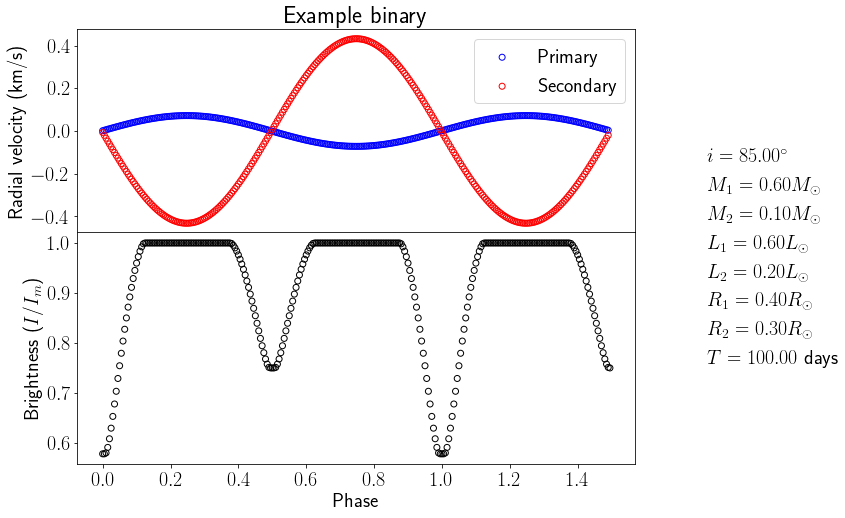

In [7]:
lcrv("Example binary", K = 1, i = 85, L1 = 0.6, L2 = .2, R = 1, R1 = 0.4, R2 = 0.3, M1 = 0.6, M2 = 0.1, period = 100)

***
## <a id = 'ebpiet'>The EBs used by Pietrzyński <i>et al.</i></a>

Now that we understand how do the light curve and radial velocities depend on the physical parameters of the two stars of the EB, let us move to a discussion of how did Pietrzyński <i>et al.</i> used EBs to determine a distance to the LMC.

### <a id = 'rv'>Radial velocity curves</a>

Pietrzyński <i>et al.</i> <a href = '#Pietrzynski'>[1]</a> observed eight EBs for 8 years, collecting high-resolution spectra with the MIKE spectrograph at the 6.5-m Magellan Clay telescope at the Las Campanas Observatory and with the HARPS spectrograph attached to the 3.6-m telescope of the European Southern Observatory on La Silla, together with near-infrared photometry obtained with the 3.5-m New Technology Telescope located on La Silla. Radial velocities were calculated with the Broadening Function (BF) formalism and TODCOR. 

The BF formalism uses the fact that Doppler effects introduce a broadening of the spectral lines of star <a href = '#Rucinski'>[4]</a>. If one deconvolves the actual observed spectrum of the star using a sharp-line spectra, then one can obtain the radial velocity causing the Doppler effect for that particular spectrum. If this is applied to various spectra measured in different epochs, then one can obtain how does the radial velocity of the star evolves with time. 

TODCOR is a TwO-Dimensional CORrelation technique that assumes the spectra of the two components are known <a href = '#Zucker'>[5]</a>. The technique correlates an observed binary spectrum against a combination of the two spectra with different shifts. This method measures simultaneously the radial velocities of the two stars by finding the maximum correlation.

### <a id = 'lc'>Light curve</a>

The Optical Gravitational Lensing Experiment (OGLE) has been monitoring around 35 million stars in the field of the LMC for more than 16 years. The EBs used in Ref. <a href = 'Pietrzynski'>[1]</a> were discovered based on the OGLE-II and OGLE-III data. Additional V and I band observations were collected with the Warsaw 1.3 m telescope at Las Campanas Observatory in the course of the OGLE IV project, and with the 1.3 m telescope at Cerro Tololo Observatory. Once the preliminary periods were calculated the new observations were secured mostly during eclipses, which resulted in a very good phase coverage of all targets. All photometric data were reduced with the image subtraction technique and were calibrated based on the OGLE-III data.

### <a id = 'obsebs'>The observed EBs</a>

I tried to retrieve the data the authors used to obtain the light curve and radial velocity curves. However, since the original spectra in ESO's archive were not flux-calibrated, I could not use them to find the radial velocities in different epochs. In addition, the OGLE repository only contains raw photometry, so that I would have to learn how to use VARTOOLS to remove the noise from the photometry and to set the zero point for magnitudes. Since this is not an astronomy tutorial, I only take the fitted values for the physical parameters of the stars in the eight EBs from the tables in the Supplementary Information of Ref. <a href = '#Pietrzynski'>[1]</a>. The orbits (mass ratio, systemic velocity, velocity amplitudes, eccentricity and periastron passage) were fitted by them using a least-squares method to the measured velocities. 

We apply the `lcrv` function we defined above to obtain the graphs for light curves and radial velocities for all the EBs studied in their paper. Of course, we are neglecting limb darkening, tidal distortion, elliptical orbits, etc.

The EBs used by Pietrzynski <i>et al.</i> have OGLE-LMC-ECL as a principal part of their names. Their number IDs are 09660, 10567, 26122, 09114, 06575, 01866, 03160, and 15260. The parameters must be provided in the following order:

\begin{equation}
    \text{params} = [\text{name}, K, i, M_1, M_2, L_1, L_2, R, R_1, R_2, T]
\end{equation}

The `showinfo` option is `True` by default. 

In [8]:
params09660 = ['OGLE-LMC-ECL-09660', 1, 87.81, 2.988, 2.969, 1, 1, 232, 43.87, 23.75, 167.6350]
params10567 = ['OGLE-LMC-ECL-10567', 1, 83.47, 3.183, 3.345, 1, 1, 189.13, 36, 25.6, 117.8708]
params26122 = ['OGLE-LMC-ECL-26122', 1, 88.45, 3.593, 3.411, 1, 1, 677.64, 32.71, 22.99, 771.7806]
params09114 = ['OGLE-LMC-ECL-09114', 1, 88.77, 3.303, 3.208, 1, 1, 281.38, 26.18, 18.64, 214.1707]
params06575 = ['OGLE-LMC-ECL-06575', 1, 82.06, 3.966, 4.152, 1, 1, 279.44, 49.35, 39.79, 189.8215]
params01866 = ['OGLE-LMC-ECL-01866', 1, 83.34, 3.574, 3.575, 1, 1, 322.68, 46.96, 28.20, 251.0068]
params03160 = ['OGLE-LMC-ECL-03160', 1, 83.36, 1.799, 1.792, 1, 1, 182.01, 37.42, 16.36, 150.0198]
params15260 = ['OGLE-LMC-ECL-15260', 1, 82.99, 1.426, 1.440, 1, 1, 174.25, 42.17, 23.51, 157.3242]

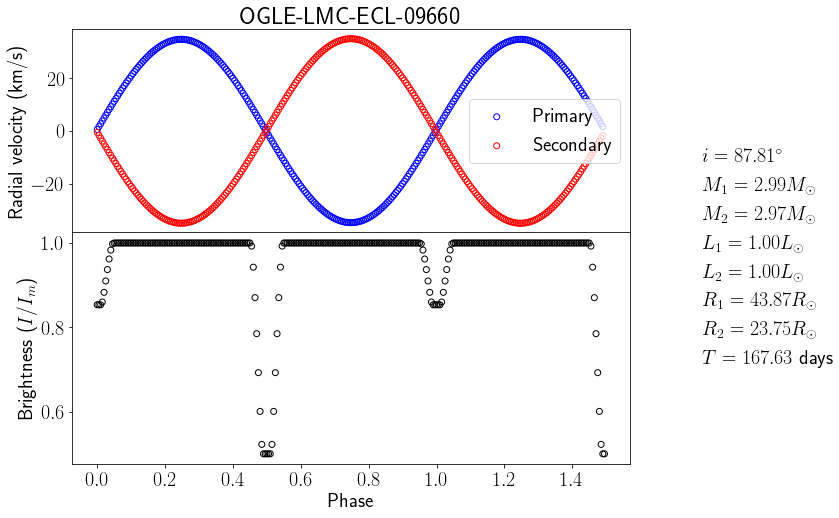

In [9]:
lcrv(*params09660)

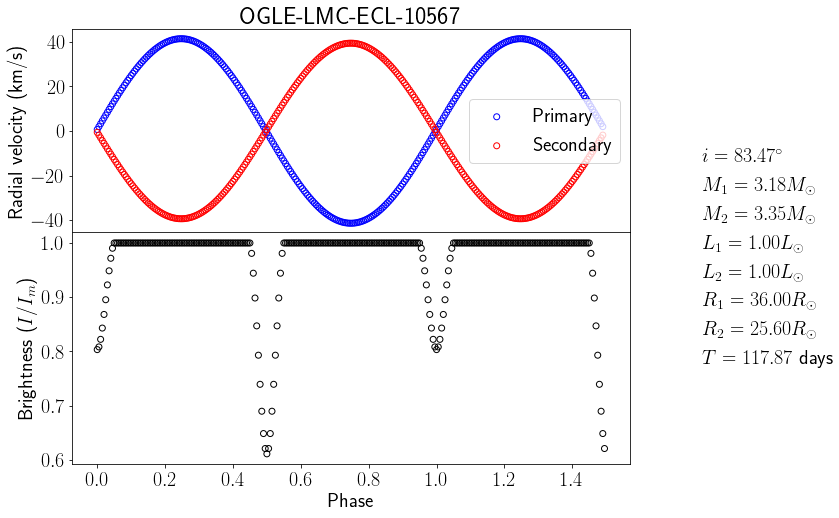

In [10]:
lcrv(*params10567)

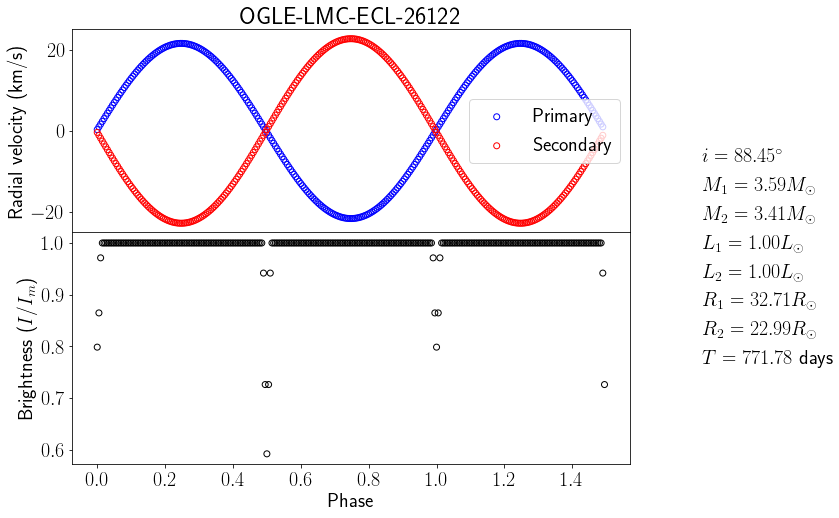

In [11]:
lcrv(*params26122)

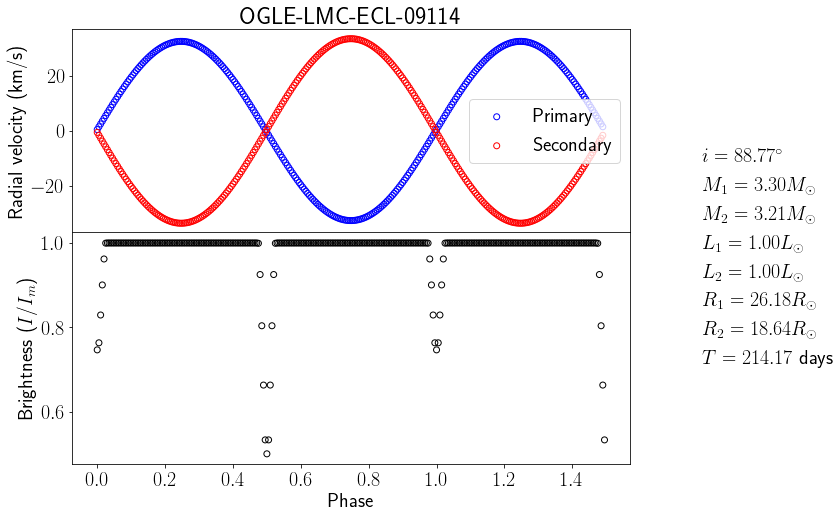

In [12]:
lcrv(*params09114)

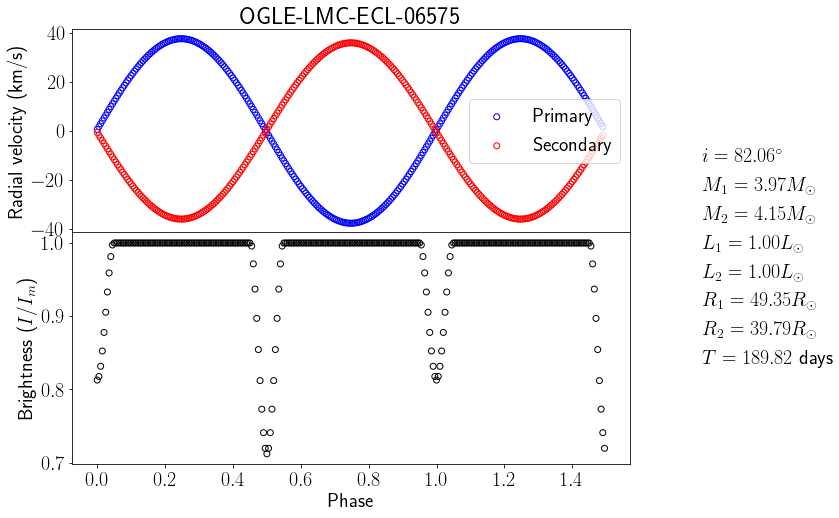

In [13]:
lcrv(*params06575)

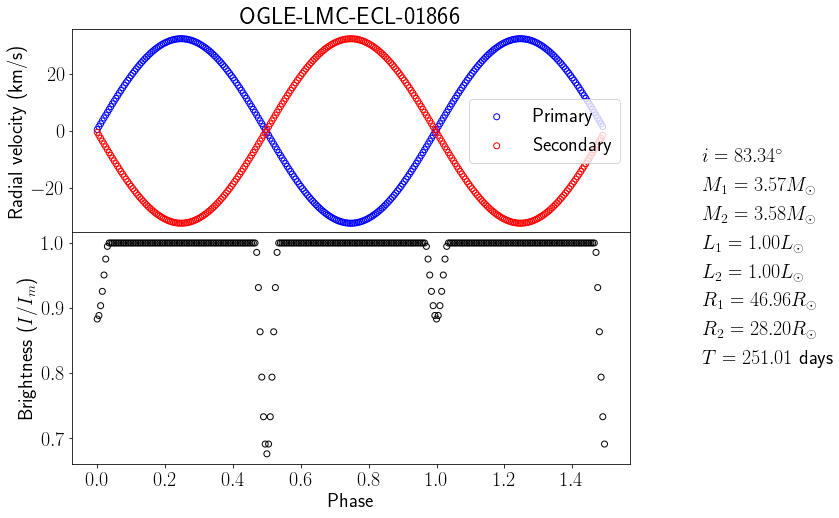

In [14]:
lcrv(*params01866)

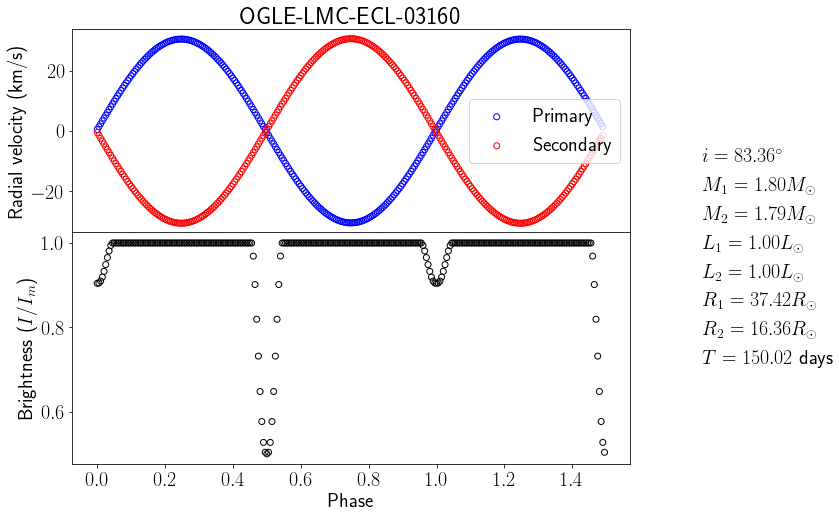

In [15]:
lcrv(*params03160)

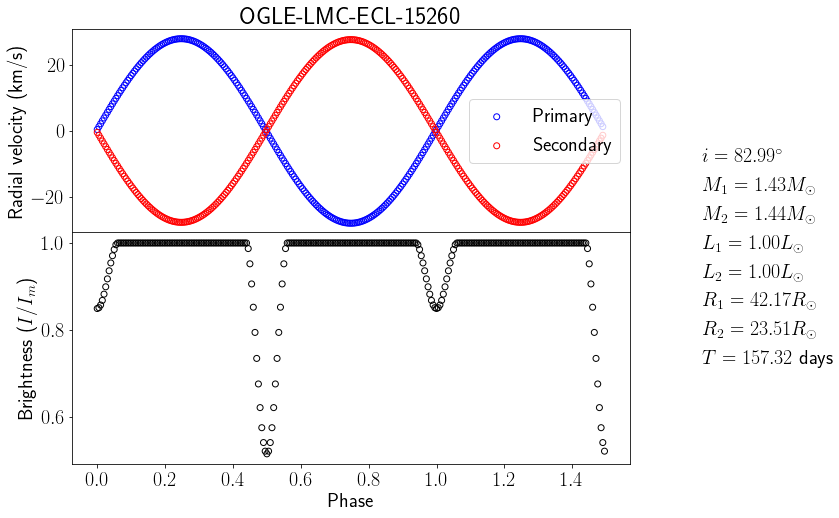

In [16]:
lcrv(*params15260)

***
## <a id = 'sbcr'>Surface brightness-color relation</a>

In 2005, Di Benedetto <a href = '#DiBenedetto'>[6]</a> reported the capabilities of the near-infrared surface brightness technique to predict reliable stellar angular diameters accurate to two percent. This technique is based on a surface-brightness/color relation (SBCR) given by an expansion of the surface brightness of a star in the $V$ band $S_{V}$ to quadratic order in the intrinsic color index $(V - K)_0$:

$$S_V = 2.656 + 1.483 (V - K)_0 - 0.044 (V - K)_0^2\,$$

with and RMS scatter $\sigma_S = 0.03$ mag. To bring the observed colors to their intrinsic values, we must correct for color extinction. To do so we recall that the observed color index $(V - K)$ relates to the intrinsic color index $(V - K)_0$ through

\begin{equation}
    (V-K)_0 = (V-K) - E(V-K)\,,
\end{equation}

where $E(V - K)$ is the color excess of $(V-K)$.

Besides, the correction of the $V$ magnitude is done as usual

\begin{equation}
    V = V_0 - R_V E(B-V)\,,
\end{equation}
with $R_V = 3.1$ and $E(B-V)$ is the color excess of $(B_V)$.

For late-type stars, we can use this very accurately calibrated relation between their surface brightness and the color $(V - K)_O$ to determine their angular sizes from optical $V$ and near-infrared $K$ photometry. From this SBCR, we can derive angular sizes of the components of our binary systems directly from the definition of the surface brightness, <i>i.e.</i>,

\begin{equation}
    S_V = V_0 + 5 \log{\phi}\,.
\end{equation}

whose inversion gives

\begin{equation}
    \phi[mas] = 10^{0.2 \, (S_V - V_0)}\,.
\end{equation}

***
## <a id = 'dlmc'>A distance to the Large Magellanic Cloud</a>

Now that we have the radii and angular diameters of all stars, we use them to calculate the angular diameter distance to each component of the EBs. In order to do that, we use the formula:

\begin{equation}
    d[pc] = 9.2984 \times \frac{R[R_{\odot}]}{\phi[mas]}\,.
\end{equation}

We use the following information, taken from the tables in the Supplementary Information of Ref. <a href = 'Pietrzynski'>[1]</a>.

In [17]:
radii     = {'09660': np.array([ufloat(23.75, 0.66), ufloat(43.87, 1.14)]), 
             '10567': np.array([ufloat(25.6, 1.6),   ufloat(36.0, 2)]), 
             '26122': np.array([ufloat(32.71, 0.51), ufloat(22.99, .48)]), 
             '09114': np.array([ufloat(26.18, 0.31), ufloat(18.64, .3)]), 
             '06575': np.array([ufloat(39.79, 1.35), ufloat(49.35, 1.45)]), 
             '01866': np.array([ufloat(28.20, 1.06), ufloat(46.96, .61)]), 
             '03160': np.array([ufloat(16.36, 1.06), ufloat(37.42, .52)]), 
             '15260': np.array([ufloat(23.51, 0.69), ufloat(42.17, .33)])}

V         = {'09660': np.array([17.303, 16.799]), '10567': np.array([17.374, 17.114]), 
             '26122': np.array([17.067, 17.827]), '09114': np.array([17.217, 17.783]), 
             '06575': np.array([16.642, 16.490]), '01866': np.array([16.916, 16.842]), 
             '03160': np.array([18.589, 17.453]), '15260': np.array([18.066, 17.390])}

VminusK   = {'09660': np.array([2.190, 2.830]), '10567': np.array([2.355, 2.730]), 
             '26122': np.array([2.561, 2.558]), '09114': np.array([2.319, 2.188]), 
             '06575': np.array([2.529, 2.775]), '01866': np.array([2.170, 2.973]), 
             '03160': np.array([2.542, 3.062]), '15260': np.array([2.737, 3.213])}

reddening = {'09660': ufloat(0.127, 0.020), '10567': ufloat(0.102, 0.020), 
             '26122': ufloat(0.140, 0.020), '09114': ufloat(0.160, 0.020), 
             '06575': ufloat(0.107, 0.020), '01866': ufloat(0.115, 0.020), 
             '03160': ufloat(0.123, 0.020), '15260': ufloat(0.100, 0.020)}

### Code implementation:

We start by defining the function that evaluates the surface brightness using the Di Benedetto fitted coefficients for the SBCR, and then use the previous equation to calculate the distance modulus of each star of the EBs. We use a mean proportionality coefficient ($1.0835$) to turn $E(V-K)$ into $A_V = R_V \,E(B - V)$, and compute the intrinsic color indexes $(V-K)_O$.

In [18]:
def mu(R, V, VminusK, reddening):
    Rv       = 3.1
    VminusK0 = VminusK - 1.0835 * Rv * reddening
    V0       = V - Rv * reddening
    Sv       = 2.656 + 1.483 * VminusK0 - 0.044 * VminusK0 ** 2
    phi      = 10 ** (.2 * (Sv - V0))
    mu       = 5 * np.array([log10(9.2984 * R[0]/phi[0]), log10(9.2984 * R[1]/phi[1])]) - 5
    return(mu)

We apply the previous equation and take the mean of the distance moduli of the two stars in an EB to find the distance modulus of the EB.

In [19]:
distmEBs = [np.mean(mu(radii[object], V[object], VminusK[object], reddening[object])) for object in radii]

Since we used a mean proportionality coefficient to turn $E(V-K)$ into $A_V$ the individual results for each EB will differ a little from the ones obtained by Pietrzyński <i>et al.</i>.

In [20]:
distmEBs

[18.493693233399+/-0.04844401432106716,
 18.477236586020325+/-0.09407017416875631,
 18.483276455613378+/-0.03793607343896123,
 18.495893747542617+/-0.035010231757610685,
 18.48499448198276+/-0.054351037443834835,
 18.48998814702906+/-0.04974764498320252,
 18.504344697077673+/-0.07568812851539398,
 18.489823321589814+/-0.03965570119016249]

Finally, we take the mean of all the distance moduli to find the distance modulus of the LMC:

In [21]:
distmLMC = np.mean(distmEBs)

In [22]:
distmLMC

18.489906333781832+/-0.020383438848659223

and use the equation

\begin{equation}
    d[pc] = 10^{\frac{\mu_{LMC}}{5} + 1}
\end{equation}

to find the distance to the LMC, whose value we present in kiloparsecs:

In [23]:
10 ** (distmLMC/5 + 1)/1e3

49.88629685978636+/-0.4682787020324341

To improve the result and find a final distance equal to $49.97 \pm 0.19\,\text{(statistical)} \pm 1.11\,\text{(systematic) kpc}$, accurate to 2%, Pietrzyński <i>et al.</i> take into account the geometry of the LMC. Besides, they evaluate the systematics coming from the calibration of the SBCR and the accuracy of the zero points in the photometry. 

This technique has recently been improved by the same group, where they have determined the distance to the LMC with a precision of 1% <a href = '#Pietrzynski2'>[7]</a>.

## References

<a id = 'Pietrzynski'>[1]</a> G. Pietrzyński <i>et al.</i>, <a href = 'https://www.nature.com/articles/nature11878'>"An eclipsing-binary distance to the Large Magellanic Cloud accurate to two per cent"</a>, Nature <b>495</b>, 76 (2013)

<a id = 'Riess'>[2]</a> A. Riess <i> et al.</i>, <a href = 'https://arxiv.org/abs/1903.07603'>"Large Magellanic Cloud Cepheid Standards Provide a 1% Foundation for the Determination of the Hubble Constant and Stronger Evidence for Physics Beyond $\Lambda$CDM"</a>, arXiv:1903.07603 (2019)

<a id = 'Bradstreet'>[3]</a> D. Bradstreet, <a href = 'http://adsabs.harvard.edu/full/2005SASS...24...23B'>"Fundamentals of Solving Eclipsing Binary Light Curves Using Binary Maker 3"</a>, Society for Astronomical Sciences, 23 (2005)

<a id = 'Rucinski'>[4]</a> S. Rucinski, <a href = 'http://adsabs.harvard.edu/abs/1992AJ....104.1968R'>"Spectral-line broadening functions of WUMa-type binaries. I. AW UMa"</a>, The Astronomical Journal <b>104</b>, 4 (1992)

<a id = 'Zucker'>[5]</a> S. Zucker, <a href = 'http://adsabs.harvard.edu/full/2012IAUS..282..371Z'>"TODCOR – Two-Dimensional Correlation"</a>, Proceedings IAU Symposium, 282 (2012)

<a id = 'DiBenedetto'>[6]</a> G. Di Benedetto, <a href = 'https://doi.org/10.1111/j.1365-2966.2005.08632.x'>"Predicting accurate stellar angular diameters by the near-infrared
surface brightness technique"</a>, Monthly Notices of the Royal Astronomical Society <b>357</b>, 174 (2005)

<a id = 'Pietrzynski2'>[7]</a> G. Pietrzyński <i>et al.</i>, <a href = 'https://www.nature.com/articles/s41586-019-0999-4'>"A distance to the Large Magellanic Cloud that is precise to one per cent"</a>, Nature <b>567</b>, 200 (2019)